<a href="https://colab.research.google.com/github/khwbilal/GA-Task/blob/main/Final_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from random import randint
# defining functions as mentioned in the Phased of GA above 
#function for intializing the population randomly
def genesis(size,var, high , low):
  pop_size = (size,var) 
  new_pop = np.random.uniform(low=low,high=high,size=pop_size)
  return new_pop

def fitness(p):
      # Evaluating fitness Interference function "double fit (double p[])".
      fitness=np.zeros((len(p)))
      for i in range(len(p)):
          x,y,z = p[i][0] , p[i][1] , p[i][2]
          fitness[i] = 2*x*z*np.exp(-x) - 2*y**3 + y**2 -3*z**3
      return fitness

def sortedPopulation(pop,fitness):
  idx = np.flip(np.argsort(fitness))
  return np.array(pop)[idx],np.array(fitness)[idx]


def selection(pop, fitness, num_parents):
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
      parents[parent_num] = pop[parent_num]
    return parents

#crossover has different types such as blend, one point, two points, uniform, and others
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]  
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

#There are different types of mutation such as bit flip, swap, inverse, uniform, non-uniform, Gaussian, shrink, and others
def mutation(offspring_crossover):
    for idx in range(offspring_crossover.shape[0]):
      if idx%10 == 0:
        random_value = np.random.uniform(-20, 20)
      else:
        random_value = np.random.uniform(-2, 2) # 4 percent change
      i= randint(0, 2)
      next = (offspring_crossover[idx, i] + random_value)
      next = min(max(next, 0), 100)
      offspring_crossover[idx, i] = next
    return offspring_crossover


In [10]:
import numpy as np

num_var = 3
sizeof_pop= 10000
upper_limit = 100
lower_limit = 0

num_parents = 100
offspring_size = num_parents*2
population = genesis(sizeof_pop , num_var, upper_limit , lower_limit)
# print(population)

Scores=[]
num_generations = 50 
for generation in range(num_generations): # termination Criteria
  print("\n\nGeneration : ", generation)
  fitness_score = fitness(population) #calculation fitness score for each individuals
  #sorting populataion and fitness_score for selection of parents and surviours
  population,fitness_score = sortedPopulation(population,fitness_score) 
  population = np.array(population)
  fitness_score = np.array(fitness_score)
  parents = selection(population, fitness_score, num_parents) #selecting parrents for crossover
  #performing crossover and getting offspring's
  offspring_crossover = crossover(parents, offspring_size=(offspring_size, num_var))
  #performing mutation on offspring's to get mutated offspring's
  offspring_mutation = mutation(offspring_crossover) 
  #replacing mutated offsprings with low fitness_score individuals sorting helps here also.
  population[sizeof_pop-offspring_size:sizeof_pop, :] = offspring_mutation 
  #storing best fitness score of each generation for analysis
  Scores.append(np.max(fitness_score))
  print("best Individuals\n",population[0])
  print("fitness best =",max(fitness_score))



Generation :  0
best Individuals
 [46.36242793  0.28419688  0.14003839]
fitness best = 0.02662114161488067


Generation :  1
best Individuals
 [46.36242793  0.28419688  0.14003839]
fitness best = 0.02662114161488067


Generation :  2
best Individuals
 [90.69519438  0.28419688  0.        ]
fitness best = 0.034859914961307074


Generation :  3
best Individuals
 [51.23179352  0.28419688  0.        ]
fitness best = 0.034859914961307074


Generation :  4
best Individuals
 [42.45447329  0.33532275  0.        ]
fitness best = 0.03703306349562256


Generation :  5
best Individuals
 [42.45447329  0.33532275  0.        ]
fitness best = 0.03703306349562256


Generation :  6
best Individuals
 [42.45447329  0.33532275  0.        ]
fitness best = 0.03703306349562256


Generation :  7
best Individuals
 [42.45447329  0.33532275  0.        ]
fitness best = 0.03703306349562256


Generation :  8
best Individuals
 [42.45447329  0.33532275  0.        ]
fitness best = 0.03703306349562256


Generation :  9

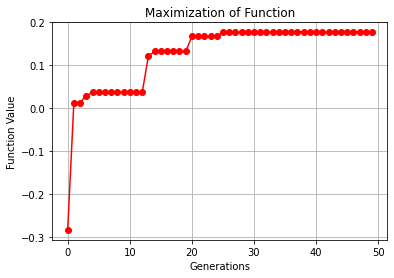

In [ ]:
import matplotlib.pyplot as plt
Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()